# Store Sales Prediction Dataset

###### We have train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set.

###### 1) Item_Identifier: Unique product ID
###### 2) Item_Weight: Weight of product
###### 3) Item_Fat_Content: Whether the product is low fat or not
###### 4) Item_Visibility: The % of total display area of all products in a store allocated to the particular product
###### 5) Item_Type: The category to which the product belongs
###### 6) Item_MRP: Maximum Retail Price (list price) of the product
###### 7) Outlet_Identifier: Unique store ID
###### 8) Outlet_Establishment_Year: The year in which store was established
###### 9) Outlet_Size: The size of the store in terms of ground area covered
###### 10) Outlet_Location_Type: The type of city in which the store is located
###### 11) Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
###### 12) Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.


## Importing Libraries

In [1]:
import klib
import dtale
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Loading Train Data and Test Data

In [2]:
df_train = pd.read_csv("D:\DISK\CodePlayground\I neuron\Store Sales Prediction\dataset\Train.csv")
df_test = pd.read_csv("D:\DISK\CodePlayground\I neuron\Store Sales Prediction\dataset\Test.csv")

## Shape of dataset

In [3]:
df_train.shape

(8523, 12)

In [4]:
df_test.shape

(5681, 11)

## Previewing dataset

In [5]:
df_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Shape and Type of our data

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Summary Statistics for Numerical columns

In [7]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Data Preparation

## Finding columns having Missing Values

In [8]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


## Data Cleaning using Klib Library

In [10]:
klib.data_cleaning(df_train)
klib.data_cleaning(df_test)

Shape of cleaned data: (8523, 12)Remaining NAs: 3873

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.52 MB (-66.67%)

Shape of cleaned data: (5681, 11)Remaining NAs: 2582

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.33 MB (-68.75%)



,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.862198,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.319801,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.753799,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.033997,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.229996,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.315399,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.144806,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.744003,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.621796,OUT017,2007,NaN,Tier 2,Supermarket Type1


## Getting Numerical and Categorical Columns

In [11]:
klib.clean_column_names(df_train)
klib.clean_column_names(df_test)

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [12]:
num_cols= []
cat_cols= []
for x in df_train.dtypes.index:
    if df_train.dtypes[x] == 'object':
        cat_cols.append(x)
    else:
        num_cols.append(x)
print("Numerical Columns : ",num_cols)
print()
print("Categorical Columns : ",cat_cols)

Numerical Columns :  ['item_weight', 'item_visibility', 'item_mrp', 'outlet_establishment_year', 'item_outlet_sales']

Categorical Columns :  ['item_identifier', 'item_fat_content', 'item_type', 'outlet_identifier', 'outlet_size', 'outlet_location_type', 'outlet_type']


In [13]:
num_cols1= []
cat_cols1= []
for x in df_test.dtypes.index:
    if df_test.dtypes[x] == 'object':
        cat_cols1.append(x)
    else:
        num_cols1.append(x)
print("Numerical Columns : ",num_cols1)
print()
print("Categorical Columns : ",cat_cols1)

Numerical Columns :  ['item_weight', 'item_visibility', 'item_mrp', 'outlet_establishment_year']

Categorical Columns :  ['item_identifier', 'item_fat_content', 'item_type', 'outlet_identifier', 'outlet_size', 'outlet_location_type', 'outlet_type']


## Feature Selection 

In [14]:
cat_cols.remove('item_identifier')
cat_cols.remove('outlet_identifier')
num_cols.remove('item_outlet_sales')
features = num_cols + cat_cols

features


['item_weight',
 'item_visibility',
 'item_mrp',
 'outlet_establishment_year',
 'item_fat_content',
 'item_type',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

In [15]:
cat_cols1.remove('item_identifier')
cat_cols1.remove('outlet_identifier')
features1 = num_cols1 + cat_cols1

features1

['item_weight',
 'item_visibility',
 'item_mrp',
 'outlet_establishment_year',
 'item_fat_content',
 'item_type',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

## Handling Missing Values

In [16]:
df_train['item_weight'].fillna(df_train['item_weight'].mean(), inplace=True)
df_test['item_weight'].fillna(df_test['item_weight'].mean(), inplace=True)

In [17]:
df_train['outlet_size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
df_test['outlet_size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [19]:
df_train['outlet_size'].fillna(df_train['outlet_size'].mode()[0], inplace=True)

In [20]:
df_test['outlet_size'].fillna(df_test['outlet_size'].mode()[0], inplace=True)

## Handling Duplicate values

In [21]:
df_train['item_fat_content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [22]:
df_test['item_fat_content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [23]:
df_train['item_fat_content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}, inplace=True)

In [24]:
df_test['item_fat_content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'}, inplace=True)

In [25]:
df_train['item_type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: item_type, dtype: int64

In [26]:
df_train['outlet_size'].value_counts()

Medium    5203
Small     2388
High       932
Name: outlet_size, dtype: int64

In [27]:
df_train['outlet_location_type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: outlet_location_type, dtype: int64

In [28]:
df_train['outlet_type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: outlet_type, dtype: int64

# Exploratory Data Analysis

## View and Analyze data using D-tale

In [29]:
dtale.show(df_train)

In [30]:
dtale.show(df_test)

## Visualization using Autoviz

In [31]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (8523, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 10


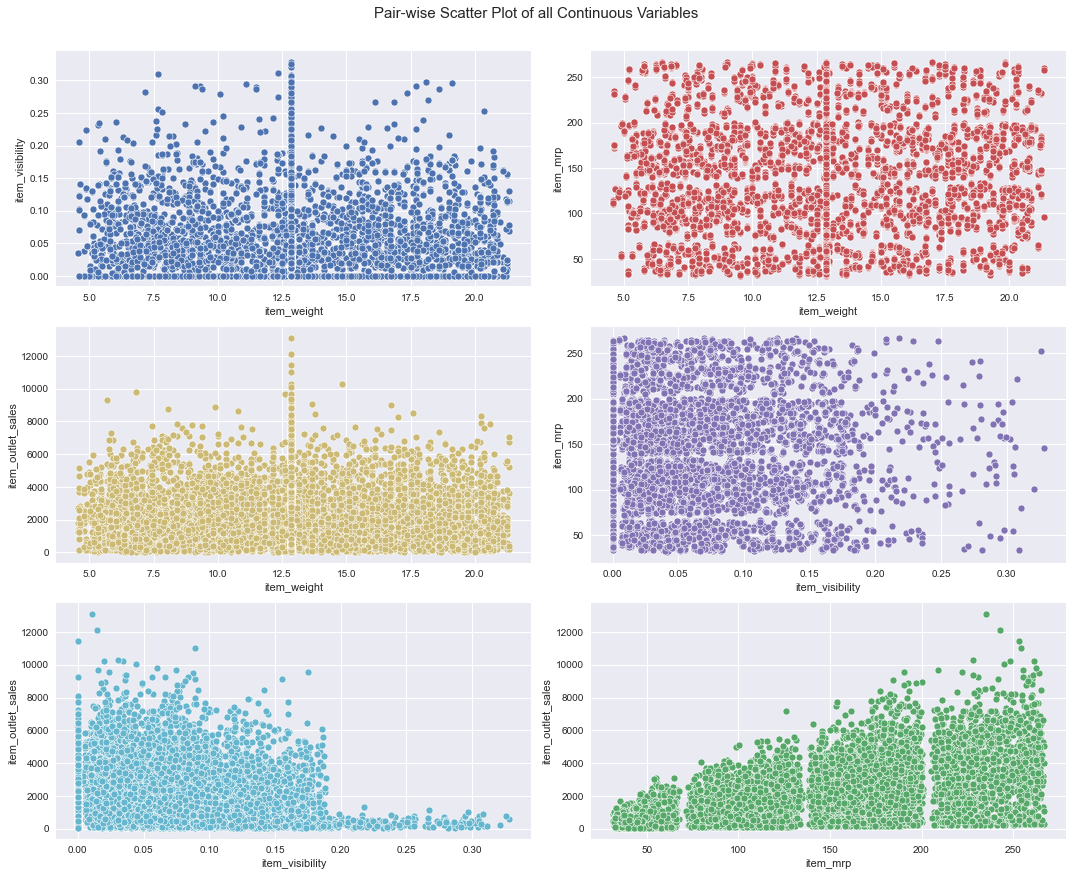

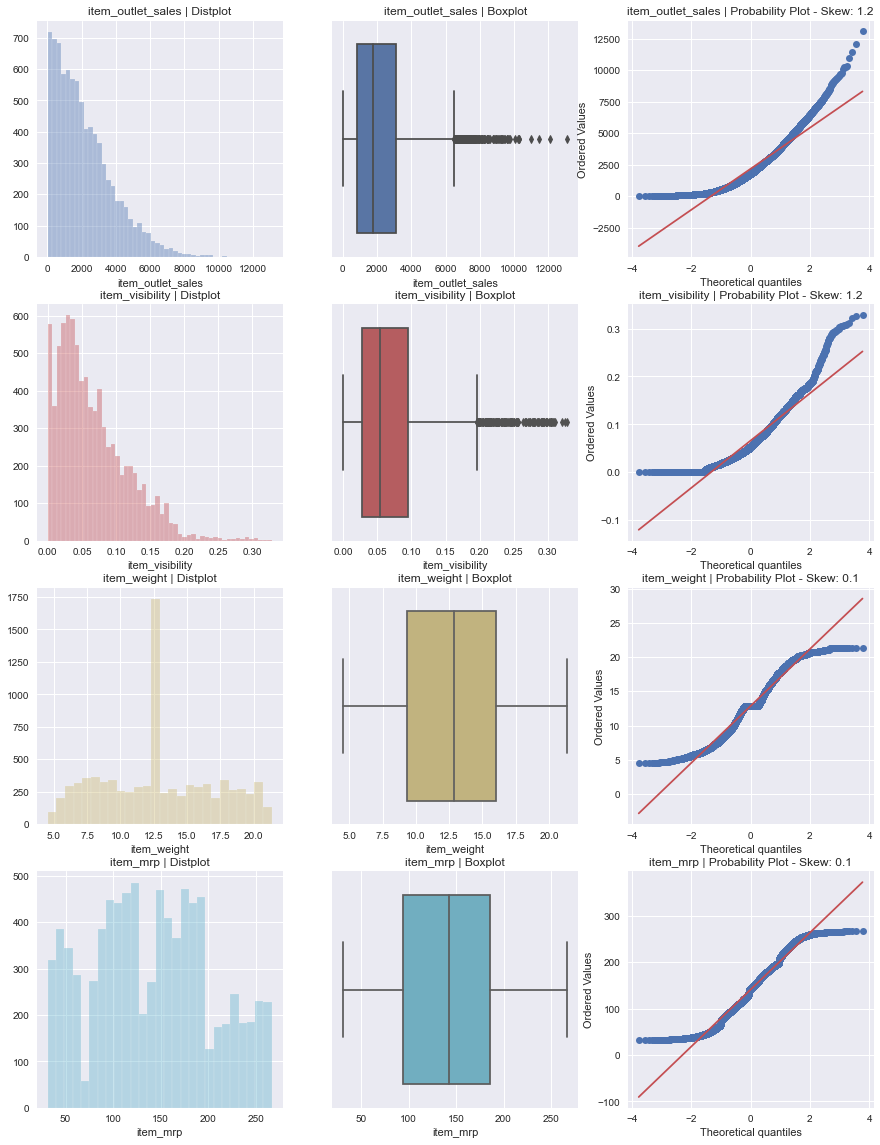

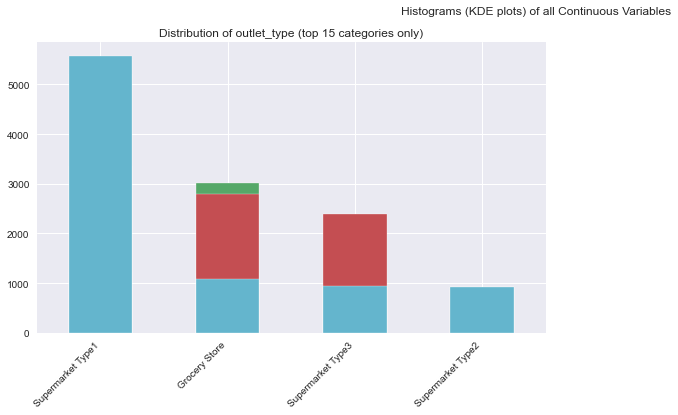

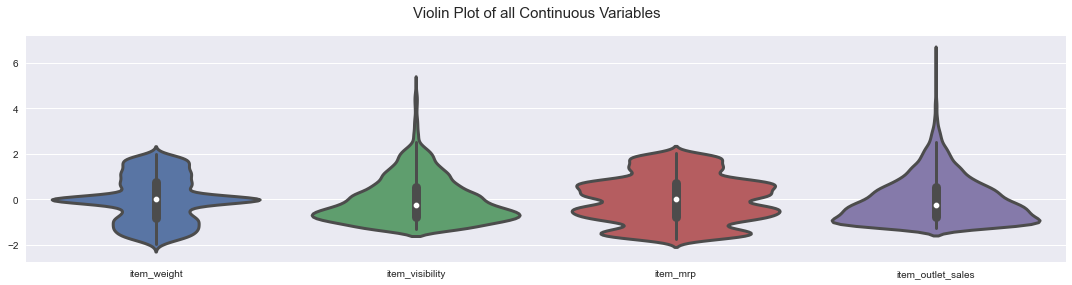

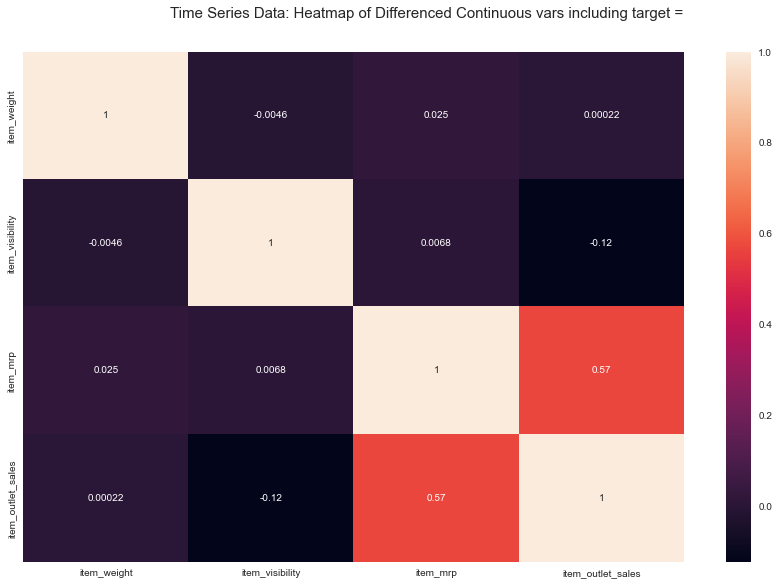

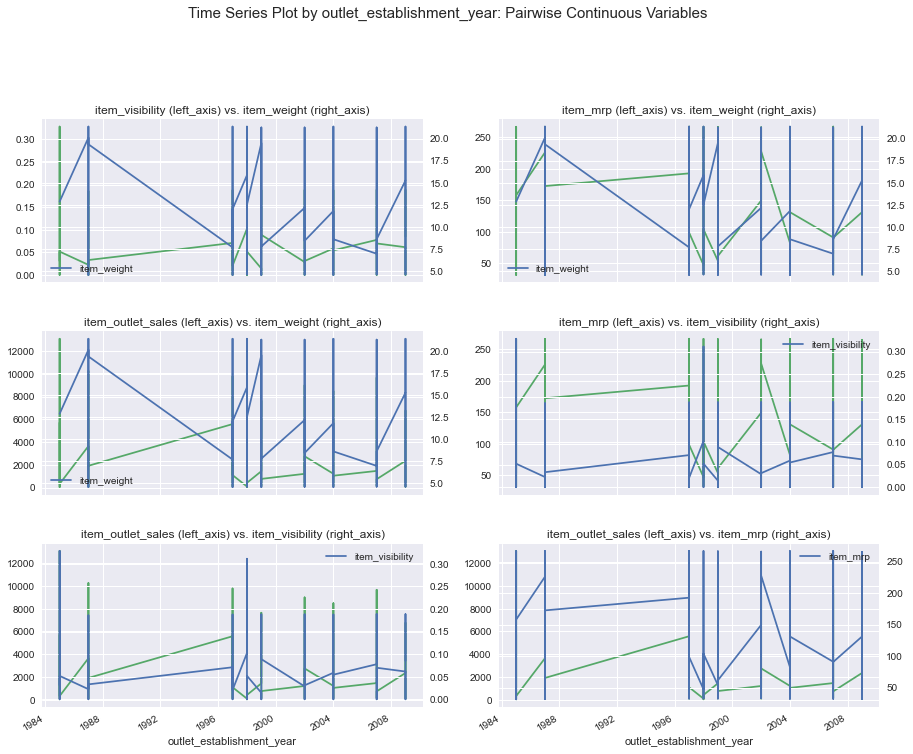

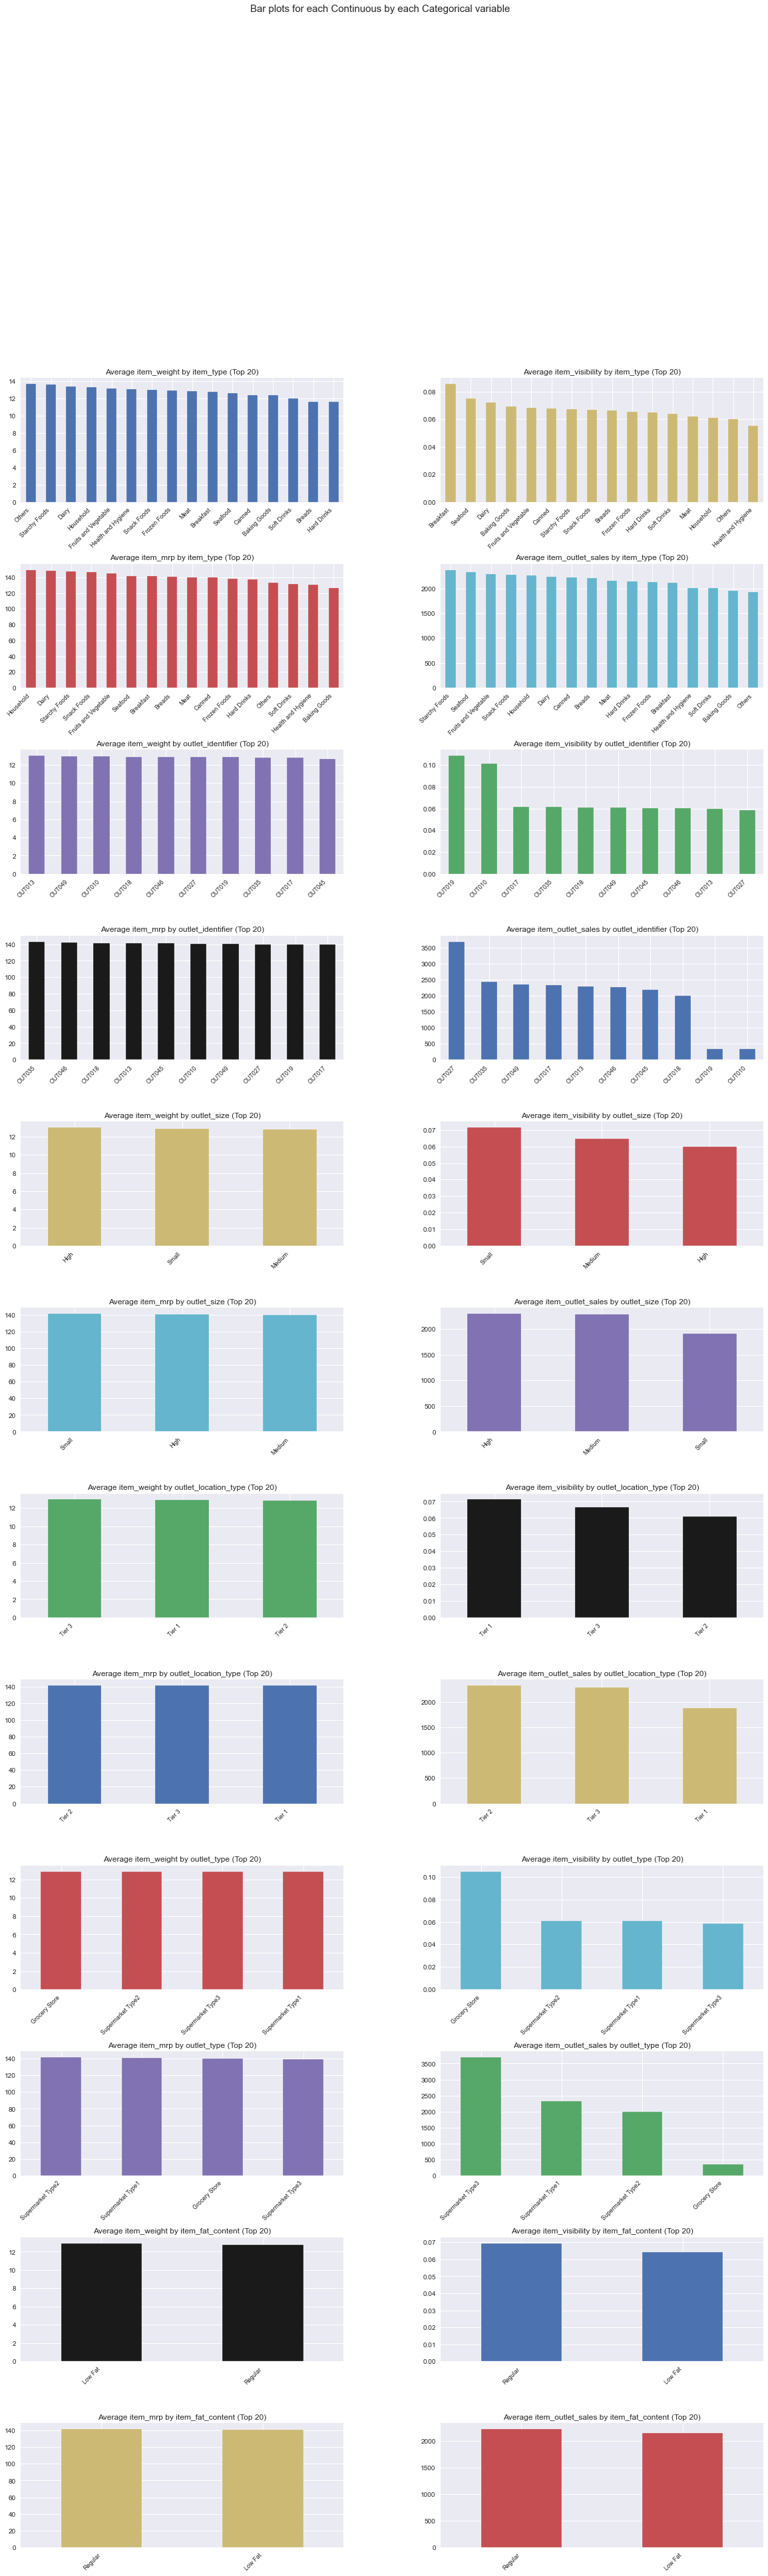

Time to run AutoViz (in seconds) = 25.821

 ###################### VISUALIZATION Completed ########################


In [32]:
fileav = ""#"D:\DISK\CodePlayground\I neuron\Store Sales Prediction\dataset\Train.csv"
sep = ","
dft = AV.AutoViz(fileav, dfte=df_train)

## Partitioning

### Spilliting Data into Train And Test data

In [33]:
y = df_train.item_outlet_sales
X = df_train[features]

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, shuffle=True)

## One-hot Encoding

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
X_train_full=pd.get_dummies(data=X_train)
X_valid_full=pd.get_dummies(data=X_valid)

In [37]:
newdata=df_test[features1]
newdata

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_fat_content,item_type,outlet_size,outlet_location_type,outlet_type
0,20.750000,0.007565,107.8622,1999,Low Fat,Snack Foods,Medium,Tier 1,Supermarket Type1
1,8.300000,0.038428,87.3198,2007,Regular,Dairy,Medium,Tier 2,Supermarket Type1
2,14.600000,0.099575,241.7538,1998,Low Fat,Others,Medium,Tier 3,Grocery Store
3,7.315000,0.015388,155.0340,2007,Low Fat,Snack Foods,Medium,Tier 2,Supermarket Type1
4,12.695633,0.118599,234.2300,1985,Regular,Dairy,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,Regular,Snack Foods,Small,Tier 1,Supermarket Type1
5677,7.600000,0.142991,169.1448,2009,Regular,Starchy Foods,Medium,Tier 3,Supermarket Type2
5678,10.000000,0.073529,118.7440,2002,Low Fat,Health and Hygiene,Medium,Tier 2,Supermarket Type1
5679,15.300000,0.000000,214.6218,2007,Regular,Canned,Medium,Tier 2,Supermarket Type1


In [38]:
new_testdata = pd.get_dummies(data=newdata)

# cleaning column names
klib.clean_column_names(new_testdata)
new_testdata

Long column names detected (>25 characters). Consider renaming the following columns ['item_type_fruits_and_vegetables', 'item_type_health_and_hygiene', 'outlet_location_type_tier_1', 'outlet_location_type_tier_2', 'outlet_location_type_tier_3', 'outlet_type_supermarket_type1', 'outlet_type_supermarket_type2', 'outlet_type_supermarket_type3'].


,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_fat_content_low_fat,item_fat_content_regular,item_type_baking_goods,item_type_breads,item_type_breakfast,item_type_canned,...,outlet_size_high,outlet_size_medium,outlet_size_small,outlet_location_type_tier_1,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery_store,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3
0,20.750000,0.007565,107.8622,1999,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,14.600000,0.099575,241.7538,1998,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,7.315000,0.015388,155.0340,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,1997,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
5677,7.600000,0.142991,169.1448,2009,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5678,10.000000,0.073529,118.7440,2002,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5679,15.300000,0.000000,214.6218,2007,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [39]:
X_train_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6818 entries, 6404 to 2732
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   item_weight                      6818 non-null   float64
 1   item_visibility                  6818 non-null   float64
 2   item_mrp                         6818 non-null   float64
 3   outlet_establishment_year        6818 non-null   int64  
 4   item_fat_content_Low Fat         6818 non-null   uint8  
 5   item_fat_content_Regular         6818 non-null   uint8  
 6   item_type_Baking Goods           6818 non-null   uint8  
 7   item_type_Breads                 6818 non-null   uint8  
 8   item_type_Breakfast              6818 non-null   uint8  
 9   item_type_Canned                 6818 non-null   uint8  
 10  item_type_Dairy                  6818 non-null   uint8  
 11  item_type_Frozen Foods           6818 non-null   uint8  
 12  item_type_Fruits 

In [40]:
klib.clean_column_names(X_train_full)

Long column names detected (>25 characters). Consider renaming the following columns ['item_type_fruits_and_vegetables', 'item_type_health_and_hygiene', 'outlet_location_type_tier_1', 'outlet_location_type_tier_2', 'outlet_location_type_tier_3', 'outlet_type_supermarket_type1', 'outlet_type_supermarket_type2', 'outlet_type_supermarket_type3'].


,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_fat_content_low_fat,item_fat_content_regular,item_type_baking_goods,item_type_breads,item_type_breakfast,item_type_canned,...,outlet_size_high,outlet_size_medium,outlet_size_small,outlet_location_type_tier_1,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery_store,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3
6404,12.857645,0.008722,123.5414,1985,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
5820,18.700000,0.014623,52.0324,2002,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
48,15.850000,0.121633,60.6220,1997,0,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4583,12.857645,0.145670,247.2776,1985,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3791,21.000000,0.049296,194.4478,2004,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,15.200000,0.020280,49.1034,1998,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
7891,12.857645,0.025616,188.1872,1985,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4859,13.500000,0.000000,78.3960,2004,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3264,18.700000,0.104890,121.4072,2002,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [41]:
klib.clean_column_names(X_valid_full)

Long column names detected (>25 characters). Consider renaming the following columns ['item_type_fruits_and_vegetables', 'item_type_health_and_hygiene', 'outlet_location_type_tier_1', 'outlet_location_type_tier_2', 'outlet_location_type_tier_3', 'outlet_type_supermarket_type1', 'outlet_type_supermarket_type2', 'outlet_type_supermarket_type3'].


,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_fat_content_low_fat,item_fat_content_regular,item_type_baking_goods,item_type_breads,item_type_breakfast,item_type_canned,...,outlet_size_high,outlet_size_medium,outlet_size_small,outlet_location_type_tier_1,outlet_location_type_tier_2,outlet_location_type_tier_3,outlet_type_grocery_store,outlet_type_supermarket_type1,outlet_type_supermarket_type2,outlet_type_supermarket_type3
4931,14.500000,0.089960,159.5604,2002,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4148,12.857645,0.009535,64.5510,1985,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
7423,11.500000,0.017742,129.6626,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4836,10.195000,0.000000,143.1154,2007,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
944,21.000000,0.049264,195.0478,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,12.500000,0.112682,119.1440,2009,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
6179,12.857645,0.223985,186.2924,1985,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
1861,12.800000,0.069561,263.0252,1987,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3598,12.857645,0.162857,54.5956,1985,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


# Model Training and Model Evaluation

In [42]:
from sklearn.ensemble import GradientBoostingRegressor


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [44]:
model = GradientBoostingRegressor()
model.fit(X_train_full,y_train)
preds = model.predict(X_valid_full)
print('score of', x)
print('mae :',mean_absolute_error(y_valid, preds))
print('R2 :',r2_score(y_valid, preds))
print('rmse :',np.sqrt(mean_squared_error(y_valid, preds)))
print()
    

score of outlet_type
mae : 773.7203584017598
R2 : 0.594925548374112
rmse : 1088.8507647270947



# Prediction on Test Data

In [45]:
model2 = GradientBoostingRegressor()
model2.fit(X_train_full,y_train)
preds1 = model.predict(new_testdata)
preds1
    

In [46]:
sales = pd.DataFrame(preds1, columns = ['item_outlet_sales'])
sales

In [47]:
df_test

In [48]:
df_test=df_test.join(sales)


In [49]:
df_test.to_csv('prediction.csv', index=False)

# Saving Model

In [50]:
import joblib

In [51]:
filename = 'model_final2.sav'
joblib.dump(model, filename)